## Importing libraries

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

## Reading the ratings datasets
##### Reading the dataset, skiping corrupt lines since there are a few 
##### Changing the headrs to be more readable
##### Printing the first 10 lines

In [92]:
book_ratings_data = pd.read_csv('Book-Ratings.csv', on_bad_lines='skip', delimiter=";")
book_ratings_data.columns = ["userId", "isbn", "bookRating"]
book_ratings_data_df = pd.DataFrame(book_ratings_data, columns=book_ratings_data.columns)
book_ratings_data_df.head(10)

,userId,isbn,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


## Reading the books datasets
##### Reading the dataset, skiping corrupt lines since there are a few, since there are a few name that are not UTF-8 complaiant we have to change the encoding 
##### Manualy changing some rows with the correct values since they ahd year / publisher / author mixed up 
##### Printing the first 10 lines

In [93]:
books_data = pd.read_csv('Books.csv', on_bad_lines='skip', delimiter=";", encoding='latin-1')
books_data.columns = ["isbn", "bookTitle", "bookAuthor","year" ,"publisher", "imageUrlS", "imageUrlM", "imageUrlL"]
books_data_df = pd.DataFrame(books_data, columns=books_data.columns)

books_data_df.loc[books_data_df.isbn == '078946697X','year'] = 2000
books_data_df.loc[books_data_df.isbn == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books_data_df.loc[books_data_df.isbn == '078946697X','publisher'] = "DK Publishing Inc"

books_data_df.loc[books_data_df.isbn == '0789466953', 'year'] = 2000
books_data_df.loc[books_data_df.isbn == '0789466953', 'bookAuthor'] = "James Buckley"
books_data_df.loc[books_data_df.isbn == '0789466953', 'publisher'] = "DK Publishing Inc"


books_data_df.loc[books_data_df.isbn == '2070426769','year'] = 2003
books_data_df.loc[books_data_df.isbn == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books_data_df.loc[books_data_df.isbn == '2070426769','publisher'] = 'Gallimard'

books_data_df.year = pd.to_numeric(books_data_df.year)
books_data_df.head(10)

C:\Users\Anton\AppData\Local\Temp\ipykernel_17920\226224533.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv('Books.csv', on_bad_lines='skip', delimiter=";", encoding='latin-1')


,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


## Reading the Users datasets
##### Reading the dataset, skiping corrupt lines since there are a few since there are a few name that are not UTF-8 complaiant we have to change the encoding 
##### Printing the first 10 lines
##### We can already here see that the location colum are a bit inconsistent are can expect some wierd behavior

In [94]:
users_data = pd.read_csv('Users.csv', on_bad_lines='skip', delimiter=";", encoding='latin-1')
users_data.columns = ["userId", "location", "age"]
users_data_df = pd.DataFrame(users_data, columns=users_data.columns)
users_data_df.head(10)

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


## We merge some dataframes so its easier to visualize

In [95]:
book_rating = pd.merge(book_ratings_data_df, books_data_df, on='isbn')

In [96]:
all_ratings = pd.merge(book_rating, users_data_df, on='userId')

In [97]:
new_book_ratings_data_df = book_ratings_data_df
reviewCount = book_ratings_data_df.isbn.value_counts()
new_book_ratings_data_df = new_book_ratings_data_df.drop(["userId"],axis=1)
new_book_ratings_data_df.columns = ['isbn', 'reviewCount']
new_book_ratings_data_df = reviewCount
new_book_ratings_data_df = new_book_ratings_data_df.to_frame()
new_book_ratings_data_df = new_book_ratings_data_df.reset_index()
new_book_ratings_data_df.columns = ['isbn', 'reviewCount']
new_book_ratings_data_df

,isbn,reviewCount
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723
...,...,...
340551,1568656386,1
340552,1568656408,1
340553,1569551553,1
340554,1570081808,1


## Merge so we can know the total reviws for each book

In [98]:
books_data_df = pd.merge(books_data_df, new_book_ratings_data_df, on='isbn')
books_data_df.head(10)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,33
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,5
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,3
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,1
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,1


## Calculating the mean rating for each book

In [115]:
mean_df = book_ratings_data_df.groupby(['isbn'])['bookRating'].mean().reset_index()
mean_df.columns = ["isbn", "mean"]
mean_df

,isbn,mean
0,0330299891,3.0
1,0375404120,1.5
2,0586045007,0.0
3,9022906116,3.5
4,9032803328,0.0
...,...,...
340551,cn113107,0.0
340552,ooo7156103,7.0
340553,Խcrosoft,7.0
340554,�3499128624,8.0


In [100]:
# def scoreCalculator(data, q=q, mean=mean):
#     v = data['Reviews']
#     R = data['User Rating']
#     #return (v * R) + (m * mean)
#     return (v/(v+q) * R) + (q/(q+v) * mean)

In [116]:
books_data_df = pd.merge(books_data_df, mean_df, on='isbn')
books_data_df.head(10)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount,bookRating,mean
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1,0.000000,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.000000,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11,4.272727,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1,0.000000,0.000000
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,33,4.212121,4.212121
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,5,1.600000,1.600000
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,3,2.666667,2.666667
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,1,0.000000,0.000000
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,1,5.000000,5.000000


## Here we can see there is alot of books with 0 as rating, beacuse we merged the data they way we did all books have some rating as 0 since no user have read all books

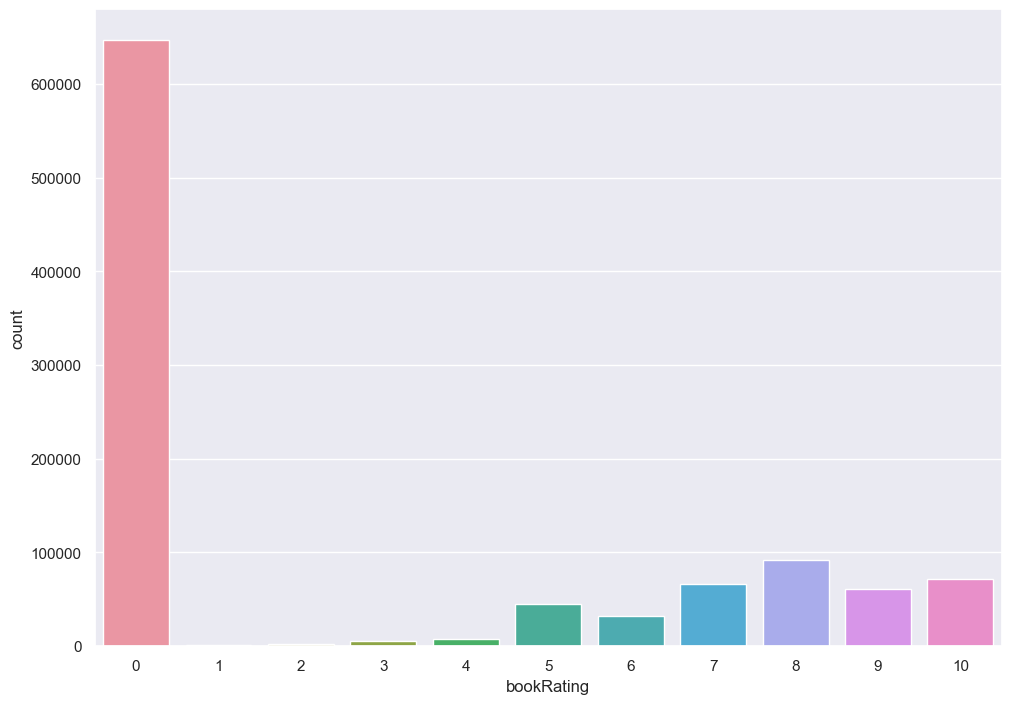

In [102]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=all_ratings['bookRating'])
plt.show()

## Removing everything with a 0 rating

In [103]:
all_ratings = all_ratings[all_ratings.bookRating != 0]

## Here we get a better feel for the scale and spread of the ratings

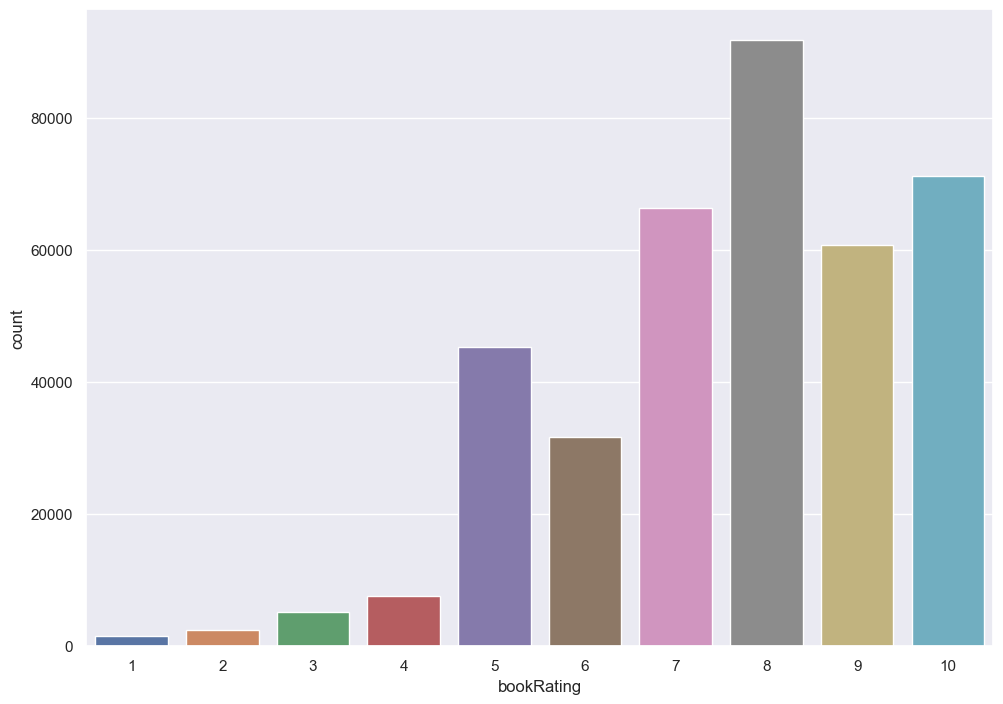

In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=all_ratings['bookRating'])
plt.show()

## Simple plot that shows how many reviews what amount of books has

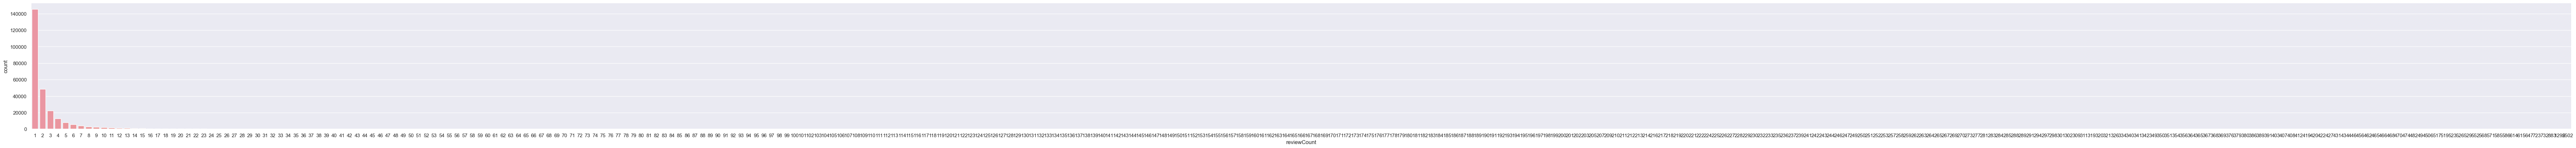

In [105]:
sns.set(rc={'figure.figsize':(100,5)})
filtered_books_data = books_data_df[books_data_df.reviewCount > 0]
sns.countplot(x=filtered_books_data['reviewCount'])
plt.show()

### Here we are plotting the years books have been realesed, with this we can see before 1970 there have are a unoticable amount of books realeased 
### And most books in 2002

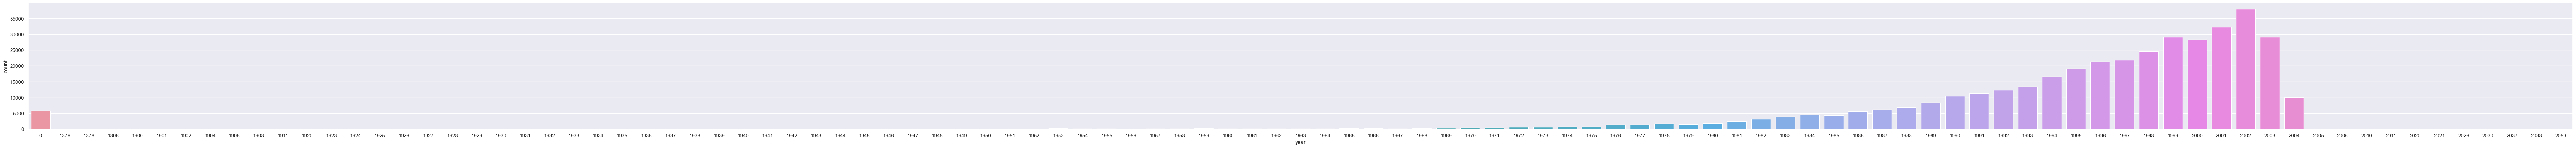

In [106]:
sns.set(rc={'figure.figsize':(100,5)})
sns.countplot(x=all_ratings['year'])
plt.show()

## Here we can see the ages of the users who have rated books, the most usual age is 24

#### This data also needs some cleanup since there are ages all the way up to 244

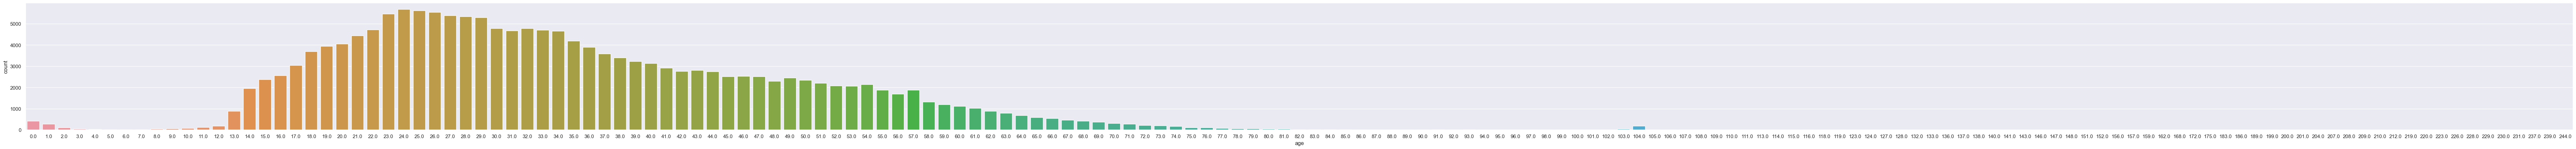

In [107]:
sns.set(rc={'figure.figsize':(100,5)})
sns.countplot(x=users_data_df['age'])
plt.show()

## Removing all ratings that have been made by some one over 100, we might lose some valid ratings but we get rid of unnesecary data

In [108]:
users_data_df = users_data_df[users_data_df.age <= 100]

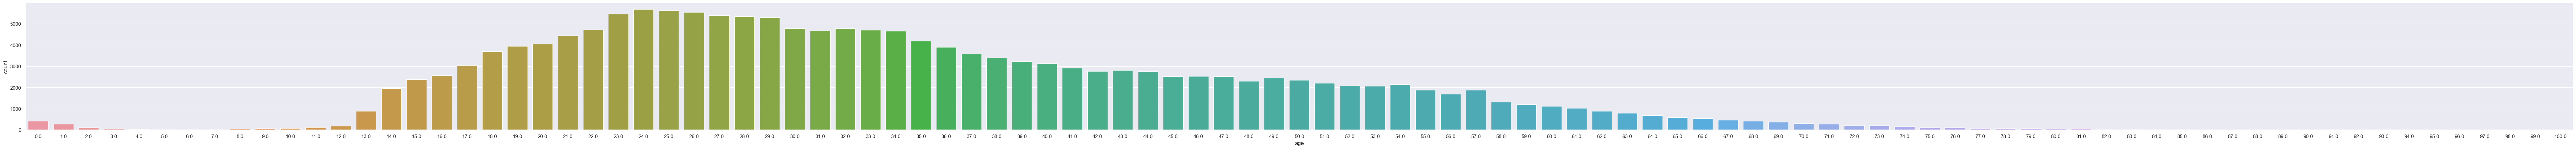

In [109]:
sns.set(rc={'figure.figsize':(100,5)})
sns.countplot(x=users_data_df['age'])
plt.show()

## Here we can see the ratings over the years

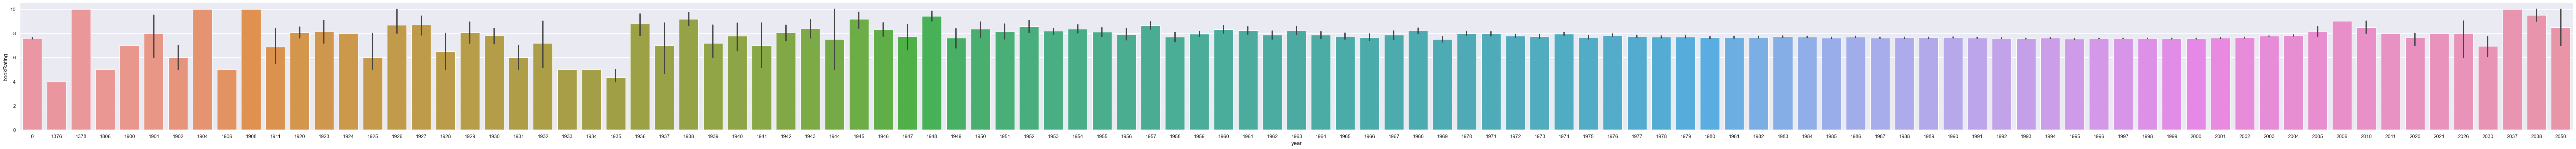

In [110]:
sns.set(rc={'figure.figsize':(100,5)})
sns.barplot(x=all_ratings['year'],y=all_ratings['bookRating'])
plt.show()

## RS

In [121]:
books_data_df_cp = books_data_df
validRatings = books_data_df_cp[(books_data_df_cp['reviewCount'] >= 1) & (books_data_df_cp['mean'] >= 2.5)]
validRatings.head(5)

,isbn,bookTitle,bookAuthor,year,publisher,imageUrlS,imageUrlM,imageUrlL,reviewCount,bookRating,mean
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.000000,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11,4.272727,4.272727
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,33,4.212121,4.212121
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,3,2.666667,2.666667


In [127]:
mean = validRatings['mean'].mean()
mean

5.951983798356312

In [128]:
q = validRatings['reviewCount'].quantile(0.80)
q

4.0

In [129]:
def scoreCalculator(data, q=q, mean=mean):
    v = data['reviewCount']
    R = data['mean']
    #return (v * R) + (m * mean)
    return (v/(v+q) * R) + (q/(q+v) * mean)

In [130]:
validRatings['score'] = validRatings.apply(scoreCalculator, axis=1)

C:\Users\Anton\AppData\Local\Temp\ipykernel_17920\931996983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validRatings['score'] = validRatings.apply(scoreCalculator, axis=1)


In [131]:
validRatings = validRatings.sort_values('score', ascending=False)

In [ ]:
validRatings.head(25)